In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np

In [ ]:
# Run the below code to mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
witchita_1 = pd.read_csv('/content/drive/MyDrive/OU Baseball Stats/fwoaklandtrackman/20230303-WichitaState-1.csv', encoding='ascii')
witchita_1.head(5)

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
0,1,2023-03-03,15:02:52.05,1,1,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Lux, Gabe",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
1,2,2023-03-03,15:03:08.41,1,2,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Lux, Gabe",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
2,3,2023-03-03,15:03:26.68,1,3,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Lux, Gabe",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
3,4,2023-03-03,15:03:44.80,1,4,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Lux, Gabe",...,NaN,NaN,High,High,High,Low,Medium,NaN,NaN,NaN
4,5,2023-03-03,15:04:09.19,1,5,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Lux, Gabe",...,-55.98901,6.59622,High,High,High,NaN,NaN,High,High,High


Select Oakland Batters

In [ ]:
oakland_batters = witchita_1[witchita_1['BatterTeam'] == 'OAK_GOL'].copy()

Distribution of pitch types faced by Oakland University players

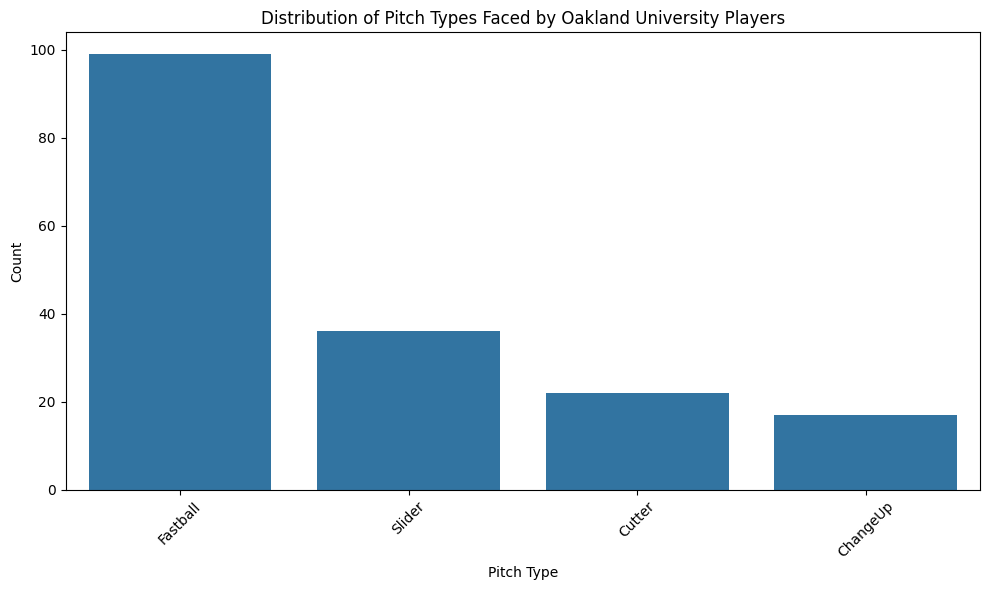

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=oakland_batters, x='TaggedPitchType', order = oakland_batters['TaggedPitchType'].value_counts().index)
plt.title('Distribution of Pitch Types Faced by Oakland University Players')
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tagged pitch vs Pitch call or Play result

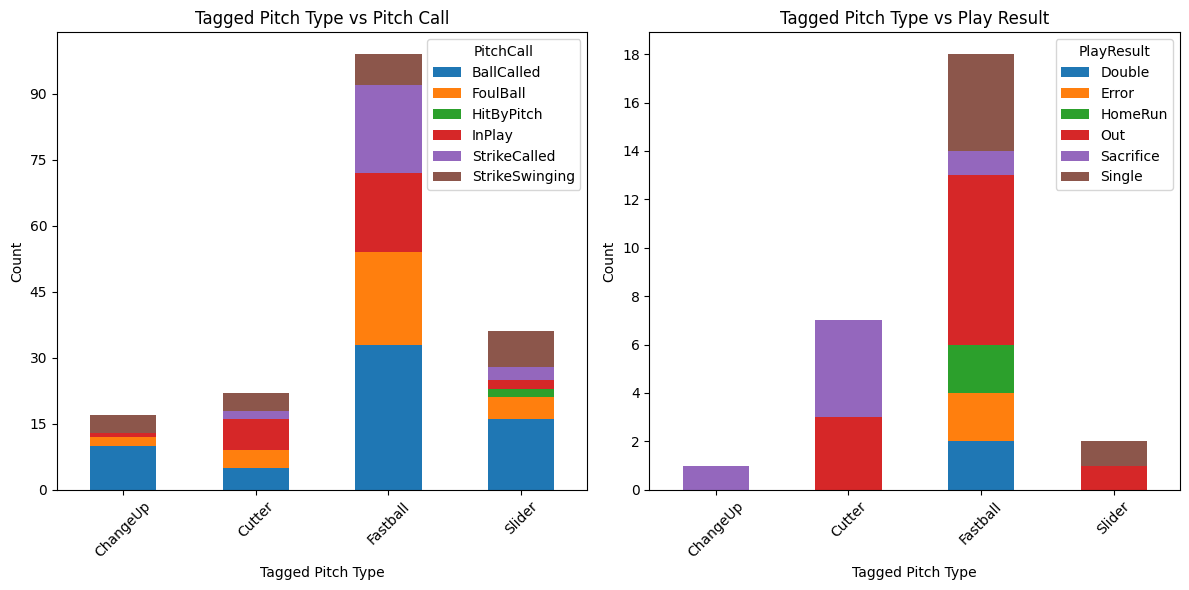

In [ ]:
# Visualization 1: Tagged Pitch Type vs Pitch Call
plt.figure(figsize=(12, 6), facecolor='white')
plt.subplot(1, 2, 1)
oakland_batters.groupby('TaggedPitchType')['PitchCall'].value_counts().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tagged Pitch Type vs Pitch Call')
plt.xlabel('Tagged Pitch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Visualization 2: Tagged Pitch Type vs Play Result

plt.subplot(1, 2, 2)
filtered_data = oakland_batters[oakland_batters['PlayResult'] != 'Undefined']
filtered_data.groupby('TaggedPitchType')['PlayResult'].value_counts().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tagged Pitch Type vs Play Result')
plt.xlabel('Tagged Pitch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(1, 2, 2)
oakland_batters.groupby('TaggedPitchType')['PlayResult'].value_counts().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Tagged Pitch Type vs Play Result')
plt.xlabel('Tagged Pitch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

Left : In Play categories

Calculate the Basic Statistics

In [ ]:
# Define a function to classify hits
def classify_hit(row):
    if 'Single' in row['PlayResult']:
        return 'Single'
    elif 'Double' in row['PlayResult']:
        return 'Double'
    elif 'Triple' in row['PlayResult']:
        return 'Triple'
    elif 'HomeRun' in row['PlayResult']:
        return 'HomeRun'
    return None

oakland_batters.loc[:, 'HitType'] = oakland_batters.apply(classify_hit, axis=1)

In [ ]:
# Calculate AtBats (excluding walks)

oakland_batters.loc[:, 'IS_PA'] =  (oakland_batters['KorBB'] == 'Walk') | (oakland_batters['PitchCall'] == 'HitByPitch') | oakland_batters['PlayResult'].isin(['Single', 'Out', 'HomeRun', 'Double', 'Error' , 'FieldersChoice' , 'Sacrifice'])
oakland_batters.loc[:, 'IS_AB'] = oakland_batters['PlayResult'].isin(['Single', 'Out', 'HomeRun', 'Double', 'Error' , 'FieldersChoice'])
oakland_batters.loc[:, 'SF_Condition'] = (oakland_batters['PlayResult'] == 'Sacrifice') & (oakland_batters['TaggedHitType'] == 'FlyBall')
# Calculate basicstats
basicstats = oakland_batters.groupby('Batter').agg(
    PA =('IS_PA', 'sum'),
    AB =('IS_AB', 'sum'),
    H =('HitType', lambda x: x.notnull().sum()),
    R =('RunsScored', 'sum'),
    Single =('HitType', lambda x: (x == 'Single').sum()),
    Double =('HitType', lambda x: (x == 'Double').sum()),
    Triple =('HitType', lambda x: (x == 'Triple').sum()),
    HR =('HitType', lambda x: (x == 'HomeRun').sum()),
    #BB =('PitchCall', lambda x: x[x == 'BallCalled'].count()),
    BB =('KorBB', lambda x: x[x == 'Walk'].count()),
    HBP =  ('PitchCall', lambda x: x[x == 'HitByPitch'].count()),
    SF = ('SF_Condition', 'sum')
)

basicstats

,PA,AB,H,R,Single,Double,Triple,HR,BB,HBP,SF
Batter,,,,,,,,,,,
"Bussey, Reggie",1,0,0,0,0,0,0,0,1,0,0
"Cleary, Ian",3,2,1,1,1,0,0,0,0,0,0
"Collins, Drew",3,2,1,1,0,0,0,1,0,0,0
"Dykstra, Ryan",0,0,0,0,0,0,0,0,0,0,0
"Green, Thomas",3,2,2,3,1,0,0,1,0,0,0
"Heidal, Brandon",4,4,1,0,0,1,0,0,0,0,0
"Jelenic, Peter",5,3,1,2,1,0,0,0,1,0,1
"Lauinger, John",4,2,0,0,0,0,0,0,1,1,0
"Lux, Gabe",3,1,1,1,1,0,0,0,0,1,0


Obtaining Batting Average (BA) for each player

In [ ]:
basicstats.loc[ : , 'BA' ] = basicstats['H'] / basicstats ['AB']
basicstats['BA'] = basicstats['BA'].fillna(0)
# OBP ={H + BB + HBP}/{AB + BB + HBP + SF}
basicstats.loc[ : , 'OBP' ] = (basicstats['H'] + basicstats['BB'] + basicstats['HBP']) / (basicstats ['AB'] + basicstats['BB'] + basicstats['HBP'] + basicstats['SF'])
# SLG ={1B + (2 * 2B) + (3 * 3B) + (4* HR)}/{AB}
basicstats.loc[ : , 'SLG' ] = (basicstats['Single'] + (2 * basicstats['Double']) + (3 * basicstats['Triple']) + (4 * basicstats['HR'])) / (basicstats['AB'])
basicstats['SLG'] = basicstats['SLG'].fillna(0)
# OPS = OBP + SLG
basicstats.loc[ : , 'OPS' ] = basicstats['OBP'] + basicstats['SLG']
# ISO = SLG - BA
basicstats.loc[ : , 'ISO' ] = basicstats['SLG'] - basicstats['BA']
basicstats

,PA,AB,H,R,Single,Double,Triple,HR,BB,HBP,SF,BA,OBP,SLG,OPS,ISO
Batter,,,,,,,,,,,,,,,,
"Bussey, Reggie",7,0,0,0,0,0,0,0,1,0,0,0.000000,1.000000,0.000000,1.000000,0.00
"Cleary, Ian",22,2,1,1,1,0,0,0,0,0,0,0.500000,0.500000,0.500000,1.000000,0.00
"Collins, Drew",19,2,1,1,0,0,0,1,0,0,0,0.500000,0.500000,2.000000,2.500000,1.50
"Dykstra, Ryan",6,0,0,0,0,0,0,0,0,0,0,0.000000,NaN,0.000000,NaN,0.00
"Green, Thomas",15,2,2,3,1,0,0,1,0,0,0,1.000000,1.000000,2.500000,3.500000,1.50
"Heidal, Brandon",11,4,1,0,0,1,0,0,0,0,0,0.250000,0.250000,0.500000,0.750000,0.25
"Jelenic, Peter",23,3,1,2,1,0,0,0,1,0,1,0.333333,0.400000,0.333333,0.733333,0.00
"Lauinger, John",15,2,0,0,0,0,0,0,1,1,0,0.000000,0.500000,0.000000,0.500000,0.00
"Lux, Gabe",14,1,1,1,1,0,0,0,0,1,0,1.000000,1.000000,1.000000,2.000000,0.00


The batting average is calculated based on the number of hits (including singles, doubles, triples, and home runs) divided by the total number of valid at-bats. A higher batting average indicates a higher success rate at hitting when the player is at bat. For instance, "Green, Thomas" has the highest batting average among the players listed, indicating a strong performance.

In [ ]:
Thomas_Green = oakland_batters[oakland_batters['Batter'] == 'Green, Thomas']
Thomas_Green.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
36,37,2023-03-03,15:20:20.10,1,1,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Green, Thomas",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
37,38,2023-03-03,15:20:34.51,1,2,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Green, Thomas",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
38,39,2023-03-03,15:20:50.14,1,3,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Green, Thomas",...,-55.54033,5.34282,High,High,High,NaN,NaN,High,Medium,High
129,130,2023-03-03,16:14:03.08,3,1,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Green, Thomas",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
130,131,2023-03-03,16:14:22.74,3,2,"Candiotti, Clark",1000051102,Right,WIC_SHO,"Green, Thomas",...,NaN,NaN,High,High,High,High,Low,NaN,NaN,NaN


Striking efficiency of Thomas Green

In [ ]:
Thomas_Green['PitchCall'].value_counts() / len(Thomas_Green) * 100

StrikeSwinging    33.333333
BallCalled        20.000000
InPlay            20.000000
StrikeCalled      13.333333
FoulBall          13.333333
Name: PitchCall, dtype: float64

Thomas Green Batting Events

In [ ]:
Thomas_Green['PlayResult'].value_counts() / len(Thomas_Green) * 100

Undefined    80.000000
Single        6.666667
Sacrifice     6.666667
HomeRun       6.666667
Name: PlayResult, dtype: float64